In [ ]:
#1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [ ]:
#2
df = pd.read_excel('/content/PCA2.xlsx', index_col='Index')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Respondents                                  42 non-null     int64
 1   Age                                          42 non-null     int64
 2   BodyWeight                                   42 non-null     int64
 3   Working hours 
daily orweekly                42 non-null     int64
 4   Quantity dismantled or 
recycled per day kg  42 non-null     int64
 5   Smoking habit                                42 non-null     int64
 6   Work place 
hygiene                          42 non-null     int64
 7   Accident                                     42 non-null     int64
 8   Violence or 
harrassment                     42 non-null     int64
 9   Chronic disease                              42 non-null     int64
 10  Change in stimuli           

In [ ]:
df.drop(df.columns[[9,27]], axis = 1, inplace = True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Respondents                                  42 non-null     int64
 1   Age                                          42 non-null     int64
 2   BodyWeight                                   42 non-null     int64
 3   Working hours 
daily orweekly                42 non-null     int64
 4   Quantity dismantled or 
recycled per day kg  42 non-null     int64
 5   Smoking habit                                42 non-null     int64
 6   Work place 
hygiene                          42 non-null     int64
 7   Accident                                     42 non-null     int64
 8   Violence or 
harrassment                     42 non-null     int64
 9   Change in stimuli                            42 non-null     int64
 10  Unintentional 
weightloss   

In [ ]:
#4
X_scaled = StandardScaler().fit_transform(df)
X_scaled[:5]

array([[-1.69129096, -1.64758487, -2.35491605, -0.14433757,  1.00312234,
        -1.21267813,  0.2773501 , -1.21267813, -0.82462113, -0.2236068 ,
        -0.52223297, -1.46882498, -1.46050146,  2.68692583, -0.25756371,
         2.09807752,  0.85982995,  0.48507125,  0.78824078,  0.79772404,
         1.45229451,  0.07738232, -0.15617376,  0.        ,  0.48507125,
        -1.41421356],
       [-1.60878896, -1.53597428,  1.0973169 , -0.14433757, -0.43592308,
         0.82462113,  0.2773501 ,  0.82462113,  1.21267813, -0.2236068 ,
         1.91485422,  0.11298654, -0.12700013, -0.39082557, -1.45952771,
        -1.47432474, -1.3288281 ,  0.48507125,  0.78824078,  0.79772404,
        -0.03542182,  0.07738232, -0.15617376,  0.        ,  0.48507125,
         0.70710678],
       [-1.52628697, -1.53597428,  0.40687031, -1.15470054, -0.23034516,
        -1.21267813,  0.2773501 , -1.21267813,  1.21267813, -0.2236068 ,
        -0.52223297,  0.11298654, -0.12700013, -0.39082557,  0.94440028,
       

In [ ]:
#5
pca=PCA(n_components=3)
# pca=PCA()
pca.fit(X_scaled)
x_pca=pca.transform(df)
print(x_pca)
x_pca.shape
df3 = pd.DataFrame(pca.components_, columns=list(df.columns))
df3
#pca.components_


[[-9.54409824e+01 -2.01007071e+02  1.07096099e+02]
 [-1.86140212e+01 -6.32755544e+01  1.59493181e+01]
 [-2.85600009e+01 -8.36470292e+01  3.02587745e+01]
 [-7.28151316e+01 -1.59166483e+02  7.84573216e+01]
 [-6.96454946e+00 -3.89711634e+01  6.76795235e+00]
 [-4.03968959e+01 -1.00204615e+02  4.14041112e+01]
 [-9.56463360e+01 -2.00392228e+02  9.79107917e+01]
 [ 1.35244172e+01  2.27718759e-01 -1.72609734e+01]
 [-5.04014042e+01 -1.16750425e+02  5.19505390e+01]
 [-3.66124308e+01 -9.94926912e+01  4.02001174e+01]
 [-1.53972053e+01 -5.67950161e+01  1.96598131e+01]
 [-9.56620435e+01 -1.94587752e+02  1.02178094e+02]
 [-9.38937728e+01 -1.95787459e+02  9.82320174e+01]
 [-3.50112576e+01 -9.39901198e+01  3.79613665e+01]
 [-3.08259044e+02 -5.91829897e+02  3.35791415e+02]
 [-8.93220144e+01 -1.89695912e+02  9.91957418e+01]
 [-3.25022347e+01 -9.10434248e+01  4.01227935e+01]
 [-7.33737486e+01 -1.75389977e+02  8.22831802e+01]
 [-3.40863481e+01 -9.13792492e+01  3.69337231e+01]
 [-3.35098571e+01 -8.98071265e+

,Respondents,Age,BodyWeight,Working hours \ndaily orweekly,Quantity dismantled or \nrecycled per day kg,Smoking habit,Work place \nhygiene,Accident,Violence or \nharrassment,Change in stimuli,Unintentional \nweightloss,Loss of appetite,Insomnia,Headache,Dizziness and\n depression,Negative effecton\n family relationship,Perceiving \ndifficulties,Change in mood\n or temper,Stress due to \nemployer decision,Anxiety due to\n insufficient income,Exposure to \nloud noise,Distraction\nor annoyance,Difficulties in hearing,Health issue \ndue to loudnoise,Habituated \nto loudnoise,Pain after \nworking hours
0,0.254597,0.252231,0.058510,0.265660,-0.110086,-0.086844,-0.070006,0.157172,0.278334,0.117737,0.051291,0.058134,0.225563,0.274946,0.325460,0.249743,0.350887,0.183497,0.144132,0.286654,0.153065,0.074169,-0.147737,0.000000e+00,0.213732,0.003231
1,0.355528,0.375993,-0.175415,0.072582,-0.198850,0.274618,-0.093997,0.327147,-0.060243,0.176381,0.145982,-0.190528,-0.105480,-0.192621,-0.098251,0.045258,-0.108789,-0.049653,-0.267766,-0.269192,-0.087994,-0.240345,-0.088261,0.000000e+00,0.134348,-0.251554
2,-0.181353,-0.108140,-0.242435,-0.214214,0.119783,-0.195008,-0.005417,-0.068796,0.009807,0.266038,-0.122494,-0.371082,-0.386273,-0.189152,-0.032029,0.262496,0.099161,0.262648,0.110035,0.078145,0.299141,0.071817,-0.136486,-1.577722e-30,0.174908,-0.272446


In [ ]:
df3.to_csv('file1.csv') 

In [ ]:
# number of components
n_pcs=pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = list(df.columns)
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df4 = pd.DataFrame(dic.items())
df4

,0,1
0,PC0,Perceiving \ndifficulties
1,PC1,Age
2,PC2,Insomnia


In [ ]:
df4.to_csv('file2.csv') 

In [ ]:
print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5),
      pca.explained_variance_ratio_)

Components =  3 ;
Total explained variance =  0.39867 [0.18215955 0.11108631 0.10542336]


In [ ]:
lst=list(df.columns.values.tolist()) 

In [ ]:
lst[27]

'Kind of injury'

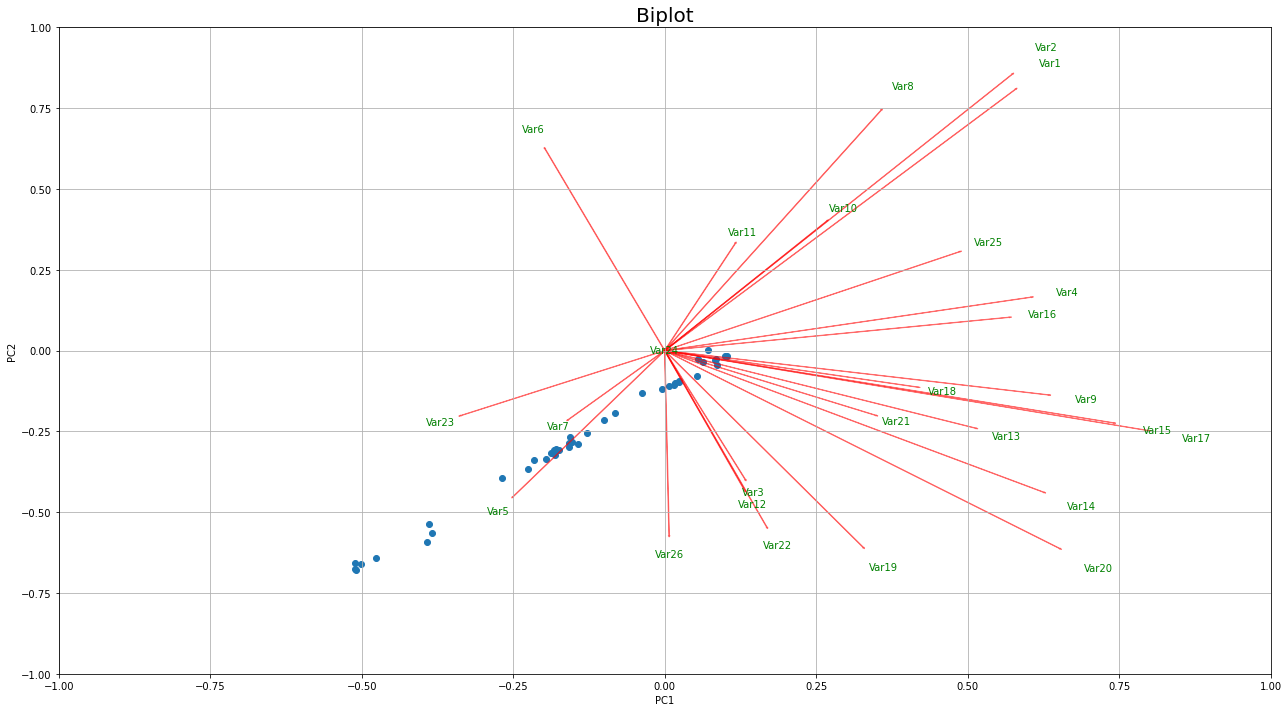

In [ ]:
#6
def myplot(score,coeff,labels=None):
    plt.figure(figsize=(18,10))
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex*1.75,ys * scaley*2)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*2.275, coeff[i,1]*2.275, color = 'r',alpha = 0.5, )
        if labels is None:
            plt.text(coeff[i,0]* 2.5, coeff[i,1] *2.5, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
            #plt.text(coeff[i,0]* 2.5, coeff[i,1] *2.5, str(lst[i]), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 2.5, coeff[i,1] * 2.5, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.title('Biplot', fontdict = {'fontsize' : 20})
    plt.tight_layout()

    return
#Call the function. Use only the 2 PCs.
myplot(x_pca[:,0:2],np.transpose(pca.components_[0:2, :]))
# plt.savefig('/content/drive/Shared drives/Monami-Extra Space/Suhi Apu/PCA.jpg')
plt.show()